# Sinkhorn example for 4d gaussians

In [2]:

import numpy as np
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import ot
import ot.plot

In [3]:
import numpy as np

# Set seed
np.random.seed(42)

# Define simple diagonal covariance matrices (no correlation)
mean1 = np.array([0, 0, 0, 0])
cov1 = np.diag([1, 1, 1, 1])

mean2 = np.array([10, -5, 3, 7])
cov2 = np.diag([2, 2, 2, 2])

# Generate samples
n_samples = 1000
X = np.random.multivariate_normal(mean1, cov1, size=n_samples)
Y = np.random.multivariate_normal(mean2, cov2, size=n_samples)

In [4]:
res = ot.solve_sample(X, Y, method='gaussian')

# recover the squared Gaussian
# Bures-Wasserstein distance
BW_dist = res.value
print(BW_dist)

184.0085995184463


In [5]:
# reg term
lambd = 0.4

W = ot.bregman.empirical_sinkhorn2(X, Y, lambd)


In [6]:
print(W.shape)
print(W)

()
184.96959586688027


## Plot as a function of $\lambda$ and $N$

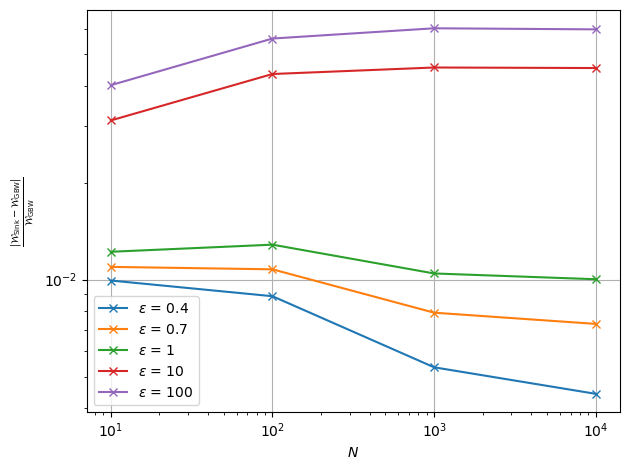

In [9]:
# Define ranges
sample_sizes = [10**i for i in range(1,5)]
epsilons = [0.4, 0.7, 1, 10, 100]
results = {eps: [] for eps in epsilons}

# Run experiment
for n in sample_sizes:
    X = np.random.multivariate_normal(mean1, cov1, size=n)
    Y = np.random.multivariate_normal(mean2, cov2, size=n)

    # Compute ground truth BW distance
    BW_dist = ot.solve_sample(X, Y, method='gaussian').value

    for eps in epsilons:
        W = ot.bregman.empirical_sinkhorn2(X, Y, reg=eps)
        rel_error = abs(W - BW_dist) / abs(BW_dist)
        results[eps].append(rel_error)

# Plot
for eps in epsilons:
    plt.loglog(sample_sizes, results[eps], marker='x', linestyle='-', label=fr"$\epsilon$ = {eps}")


plt.xlabel(r"$N$")
plt.ylabel(r"$\frac{|\mathcal{W}_{\mathrm{Sink}} - \mathcal{W}_{\mathrm{GBW}}|}{\mathcal{W}_{\mathrm{GBW}}}$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('4d_gaussian_sinkhorn.png', dpi=300, bbox_inches='tight')
plt.show()


For parallel version of previous code check mpi_sinkhorn_gaussian.py